Session 2 notebook

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tld import get_tld
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from interpret.glassbox import ExplainableBoostingClassifier
import xgboost as xgb
import seaborn as sns
import time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,make_scorer, classification_report, accuracy_score, f1_score, cohen_kappa_score

In [2]:
df = pd.read_csv('Phishing_Mitre_Dataset_Summer_of_AI.csv')

In [3]:
df1 = pd.read_csv('Phishing_Mitre_Dataset_Summer_of_AI.csv')

In [4]:
#create URL features

def entropy(url_string):
        string = url_string.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return abs(entropy)
    
def has_www(url_string):
    if (url_string.find('www.') == -1):
        return 0
    else:
        return 1
    
df['url_length'] = df['URL'].apply(len)
df['url_entropy'] = df['URL'].apply(entropy)
df['3rd_level_domain'] = df['URL'].apply(has_www)

df['count_non_alpha_full'] = df['URL'].str.findall(r'[^a-zA-Z]').str.len() 

Text(0.5, 1.0, 'type of our data ')

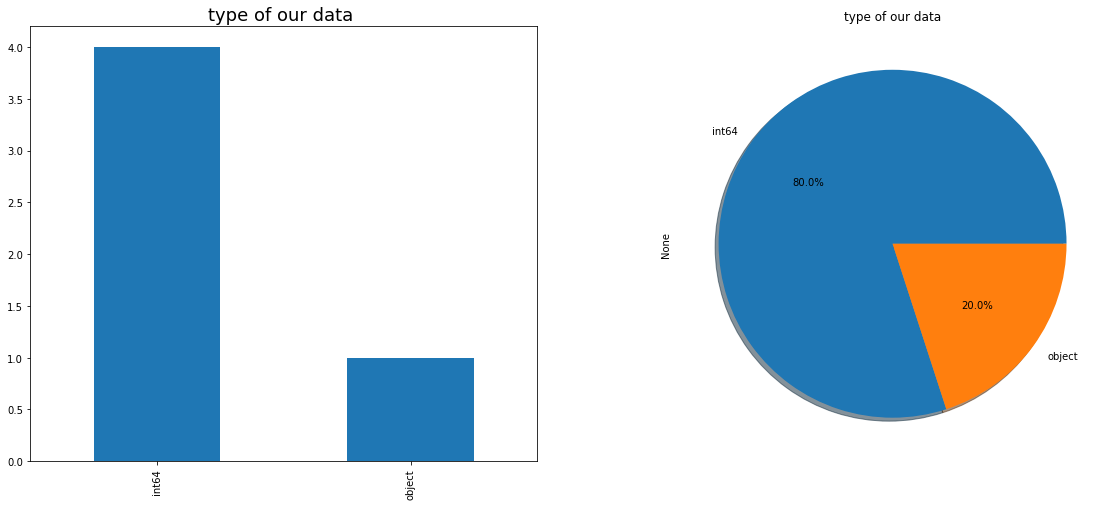

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df1.dtypes.value_counts().plot.pie(explode=None,autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df1.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

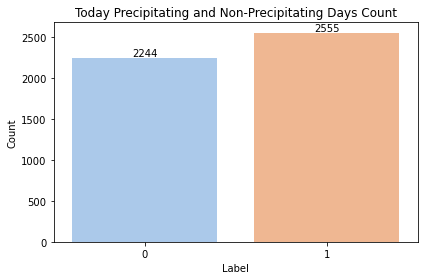

In [6]:
q = sns.countplot(x = df1['Label'], palette = 'pastel')
q.set(xlabel = 'Label')
q.set(ylabel = 'Count')
q.set(title = 'Today Precipitating and Non-Precipitating Days Count')
plt.tight_layout()
for p in q.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    q.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')

In [7]:
df2 = df.drop('Label',axis =1)

Text(68.09375, 0.5, '')

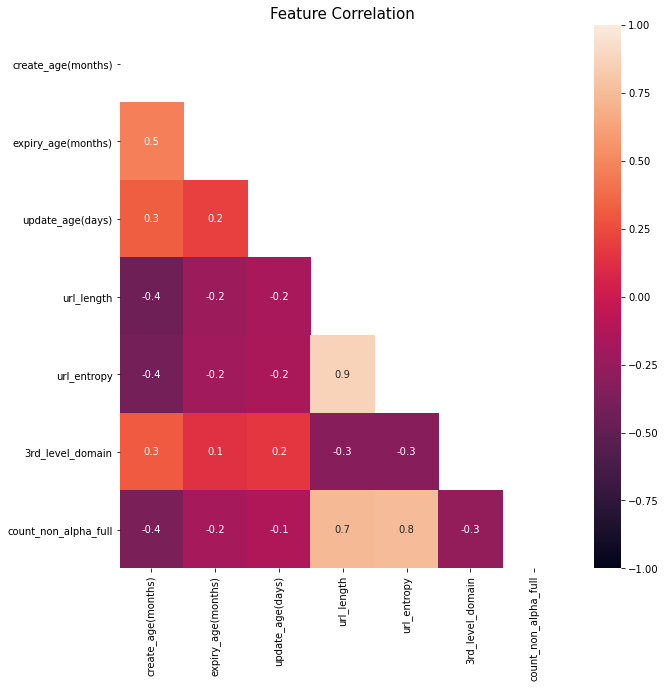

In [8]:
plt.figure(figsize = (10,10))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True,fmt='.1g')
plt.title('Feature Correlation',fontsize=15)
plt.xlabel("")
plt.ylabel("")


In [9]:
df.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,0,32
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,1,9
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,0,35
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,0,8
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,0,8


(array([4.475e+03, 2.370e+02, 4.300e+01, 1.100e+01, 5.000e+00, 1.300e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-115. ,  892.4, 1899.8, 2907.2, 3914.6, 4922. , 5929.4, 6936.8,
        7944.2, 8951.6, 9959. ]),
 <a list of 10 Patch objects>)

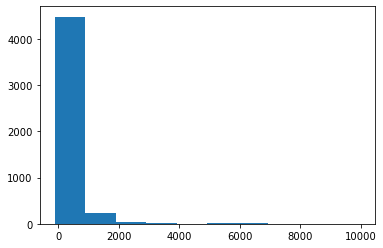

In [10]:
plt.hist(df['update_age(days)'])

In [11]:
df.shape

(4799, 9)

In [12]:
#imputer

df['create_age(months)'][df['create_age(months)']<0]=np.nan
df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
df['update_age(days)'][df['update_age(days)']<0]=np.nan

df_dropped = df.dropna()

df_impute = df.copy()

df_impute['create_age(months)'].fillna((df_impute['create_age(months)'].mean()),inplace=True)
df_impute['expiry_age(months)'].fillna((df_impute['expiry_age(months)'].mean()),inplace=True)
df_impute['update_age(days)'].fillna((df_impute['update_age(days)'].mean()),inplace=True)

<ipython-input-12-d9a4c77fcb38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_age(months)'][df['create_age(months)']<0]=np.nan
<ipython-input-12-d9a4c77fcb38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
<ipython-input-12-d9a4c77fcb38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['update_age(days)'][df['update_age(days)']<0]=np.nan


In [13]:
#imputed df models
X = df_impute[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_impute['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Time taken : 0.010999202728271484
Logestic Regression Model accuracy score: is 0.9094
F1 score for logistic regression is: 0.9106 
Cohen Kappa score for logistic regression is: 0.8187 


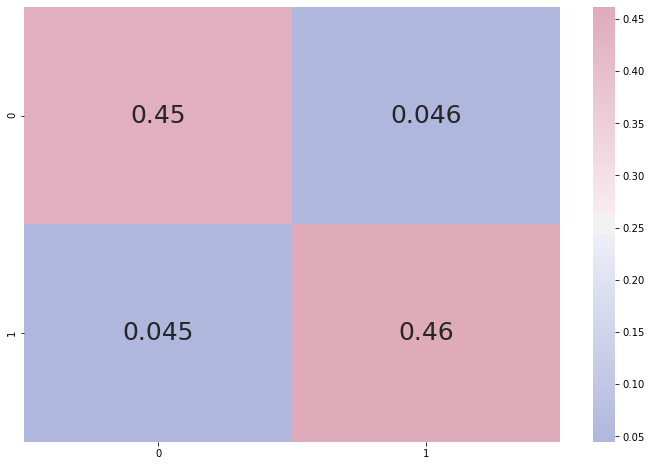

In [14]:
# Train a logistic regression model on the training set
t0=time.time()
lreg = LogisticRegression(solver='liblinear', random_state=0)
lreg.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_lr = lreg.predict(X_test)
acs_lr=accuracy_score(y_test, Y_pred_test_lr)
f1_lr=f1_score(y_test, Y_pred_test_lr)
ck_lr=cohen_kappa_score(y_test, Y_pred_test_lr)
print('Logestic Regression Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for logistic regression is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for logistic regression is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test_lr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.008500099182128906
KNN Model accuracy score: is 0.9021
F1 score for KNN is: 0.9064 
Cohen Kappa score for KNN is: 0.8040 


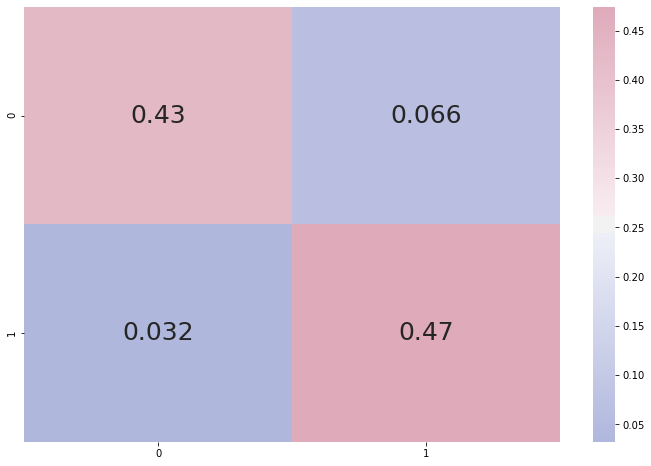

In [15]:

t0=time.time()
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_lr = KNN.predict(X_test)
acs_lr=accuracy_score(y_test, Y_pred_test_lr)
f1_lr=f1_score(y_test, Y_pred_test_lr)
ck_lr=cohen_kappa_score(y_test, Y_pred_test_lr)
print('KNN Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for KNN is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for KNN is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test_lr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.009999275207519531
DT Model accuracy score: is 0.9021
F1 score for DT is: 0.9064 
Cohen Kappa score for DT is: 0.7916 


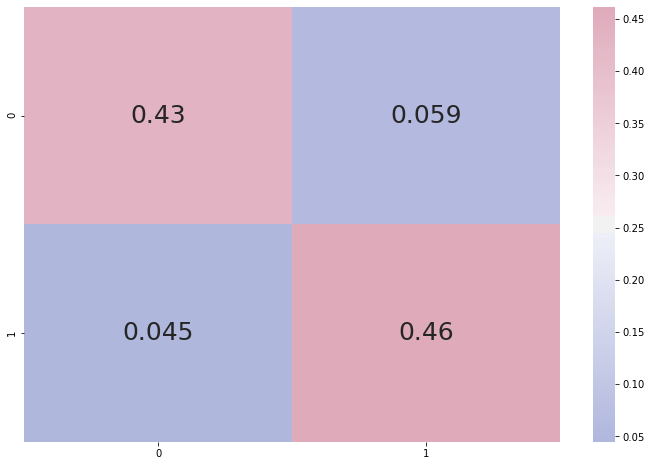

In [16]:
t0=time.time()
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('DT Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for DT is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for DT is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.0030012130737304688
GNB Model accuracy score: is 0.9021
F1 score for GNB is: 0.8984 
Cohen Kappa score for GNB is: 0.7980 


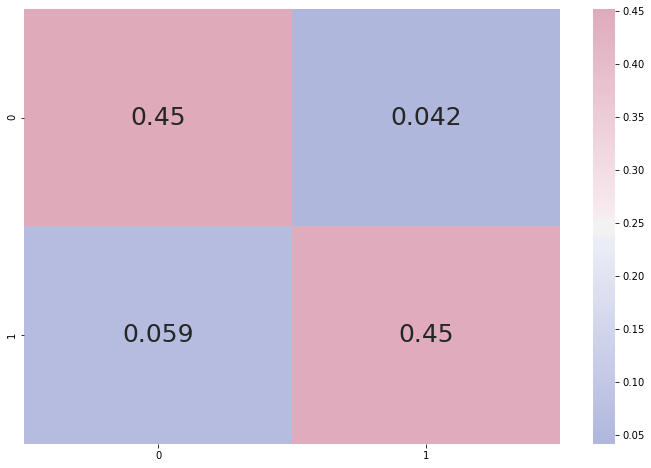

In [17]:
t0=time.time()
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = GNB.predict(X_test)
acs=accuracy_score(y_test, Y_pred_test)
f1_lr=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('GNB Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for GNB is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for GNB is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.20650029182434082
SVM Model accuracy score: is 0.9021
F1 score for SVM is: 0.8873 
Cohen Kappa score for SVM is: 0.7644 


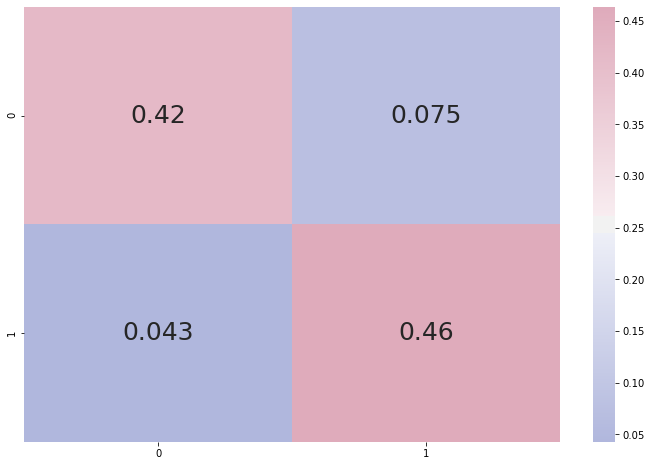

In [18]:
t0=time.time()
SVMC = svm.SVC()
SVMC.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = SVMC.predict(X_test)
acs=accuracy_score(y_test, Y_pred_test)
f1_lr=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('SVM Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for SVM is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for SVM is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.20650076866149902
SVM Model accuracy score: is 0.9021
F1 score for SVM is: 0.8873 
Cohen Kappa score for SVM is: 0.7644 


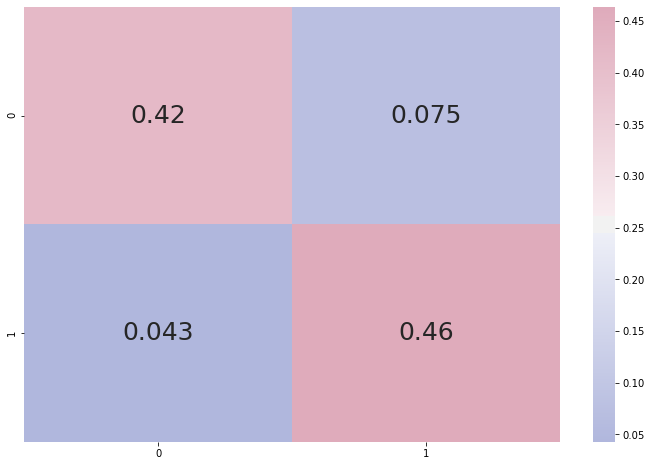

In [19]:


t0=time.time()
SVMC = svm.SVC()
SVMC.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = SVMC.predict(X_test)
acs=accuracy_score(y_test, Y_pred_test)
f1_lr=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('SVM Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for SVM is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for SVM is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.11800026893615723
AdaBoost Model accuracy score: is 0.9021
F1 score for AdaBoost is: 0.8873 
Cohen Kappa score for AdaBoost is: 0.7644 


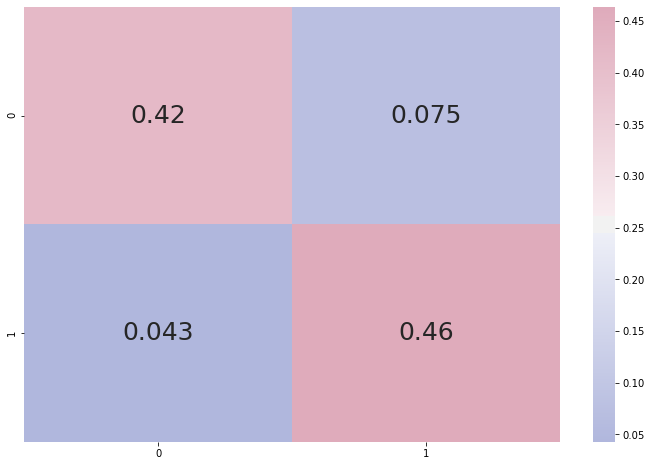

In [20]:

t0=time.time()
ADA = AdaBoostClassifier(n_estimators=50)
ADA.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = SVMC.predict(X_test)
acs=accuracy_score(y_test, Y_pred_test)
f1_lr=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('AdaBoost Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for AdaBoost is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for AdaBoost is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 2.2285001277923584
ebm Model accuracy score: is 0.9021
F1 score for ebm is: 0.8873 
Cohen Kappa score for ebm is: 0.7644 


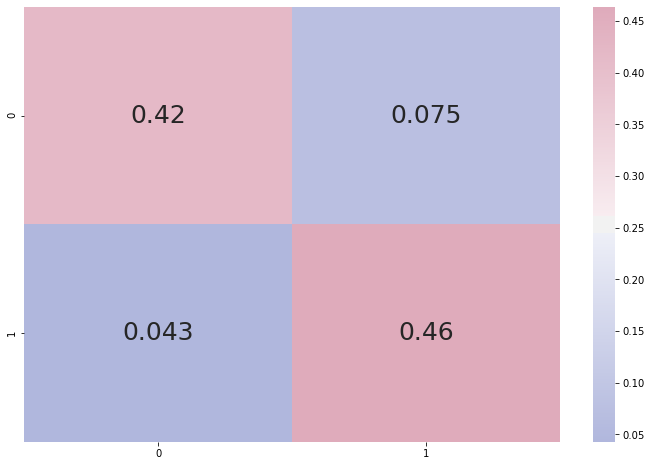

In [21]:
ebm = ExplainableBoostingClassifier().fit(X_train, y_train)
y_pred = ebm.predict(X_test)
f1_score(y_test, y_pred)


t0=time.time()
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = SVMC.predict(X_test)
acs=accuracy_score(y_test, Y_pred_test)
f1_lr=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('ebm Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for ebm is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for ebm is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})


C:\Users\Sajjad\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken : 1.0620005130767822
Gradient Boosing Model accuracy score is 0.9198
F1 score for Gradient Boosing Model is 0.9225
Cohen Kappa score for Gradient Boosing Model is 0.8395


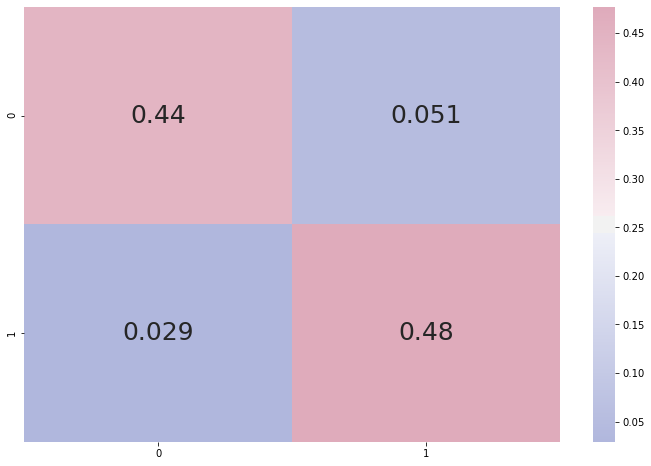

In [22]:
t0=time.time()
XGBmodel = XGBClassifier(objective='binary:logistic',eta ='0.25',max_depth ='16',n_estimators=500)
XGBmodel.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_XGB = XGBmodel.predict(X_test)

acs_xb=accuracy_score(y_test, Y_pred_test_XGB)
f1_xb=f1_score(y_test, Y_pred_test_XGB)
ck_xb=cohen_kappa_score(y_test, Y_pred_test_XGB)
print('Gradient Boosing Model accuracy score is {0:0.4f}'. format(acs_xb))
print("F1 score for Gradient Boosing Model is {0:0.4f}". format(f1_xb))
print("Cohen Kappa score for Gradient Boosing Model is {0:0.4f}". format(ck_xb))

# Gradient Boosting confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test_XGB)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [23]:
#dropped df models
X = df_dropped[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_dropped['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Time taken : 0.00800013542175293
Logestic Regression Model accuracy score: is 0.9556
F1 score for logistic regression is: 0.9506 
Cohen Kappa score for logistic regression is: 0.9103 


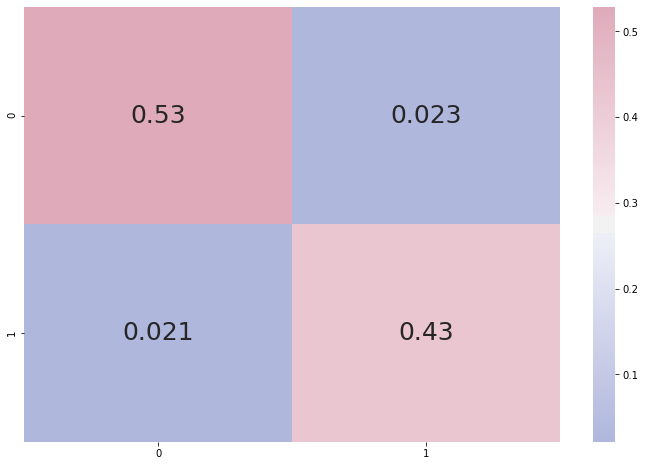

In [24]:
# Train a logistic regression model on the training set
t0=time.time()
lreg = LogisticRegression(solver='liblinear', random_state=0)
lreg.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_lr = lreg.predict(X_test)
acs_lr=accuracy_score(y_test, Y_pred_test_lr)
f1_lr=f1_score(y_test, Y_pred_test_lr)
ck_lr=cohen_kappa_score(y_test, Y_pred_test_lr)
print('Logestic Regression Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for logistic regression is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for logistic regression is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test_lr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.005498647689819336
KNN Model accuracy score: is 0.9556
F1 score for KNN is: 0.9506 
Cohen Kappa score for KNN is: 0.9815 


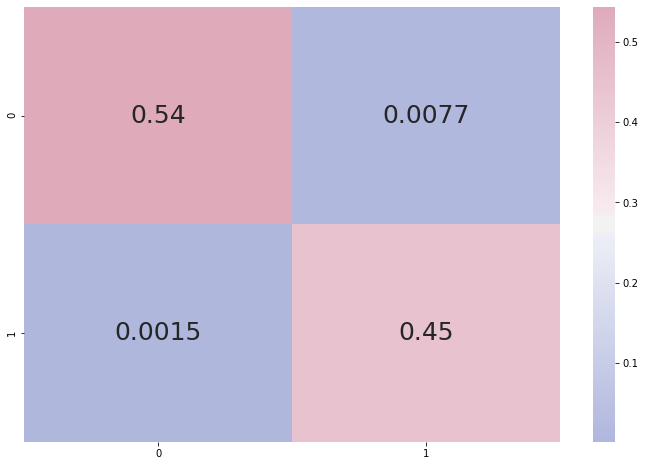

In [25]:
t0=time.time()
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('KNN Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for KNN is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for KNN is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.00699925422668457
DT Model accuracy score: is 0.9556
F1 score for DT is: 0.9506 
Cohen Kappa score for DT is: 0.8975 


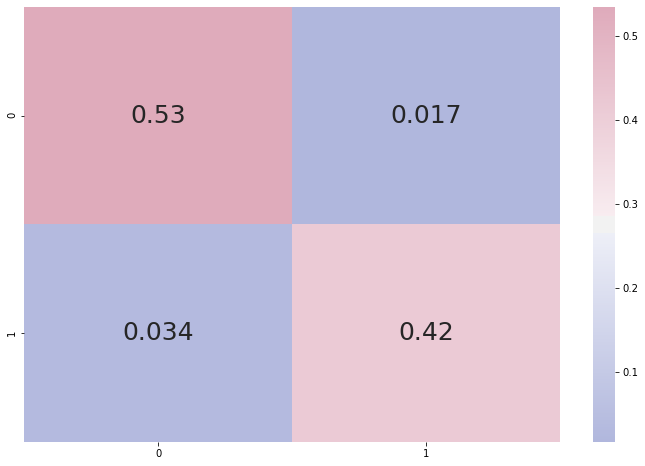

In [26]:
t0=time.time()
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('DT Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for DT is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for DT is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.002500295639038086
GNB Model accuracy score: is 0.9556
F1 score for GNB is: 0.9506 
Cohen Kappa score for GNB is: 0.8975 


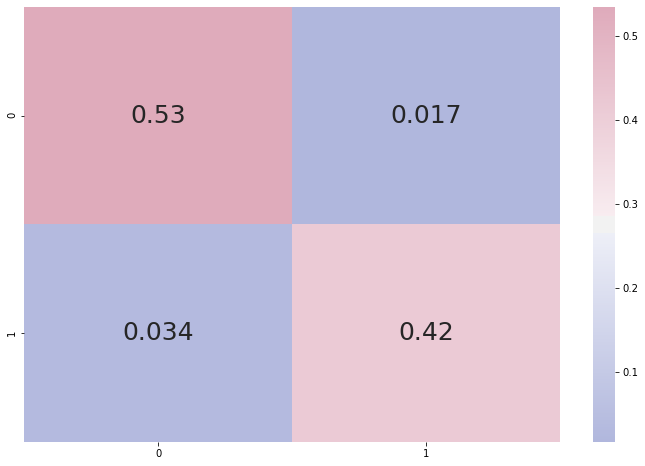

In [27]:
t0=time.time()
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('GNB Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for GNB is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for GNB is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.0735013484954834
SVM Model accuracy score: is 0.9556
F1 score for SVM is: 0.9506 
Cohen Kappa score for SVM is: 0.8975 


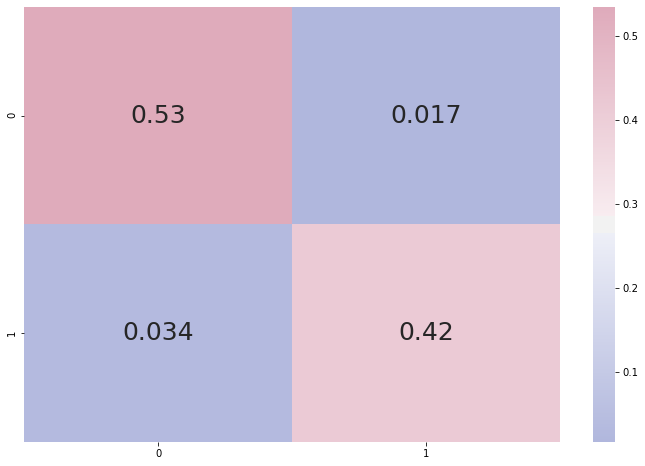

In [28]:
t0=time.time()
SVMC = svm.SVC()
SVMC.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('SVM Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for SVM is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for SVM is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.14049959182739258
RF Model accuracy score: is 0.9556
F1 score for RF is: 0.9506 
Cohen Kappa score for RF is: 0.8975 


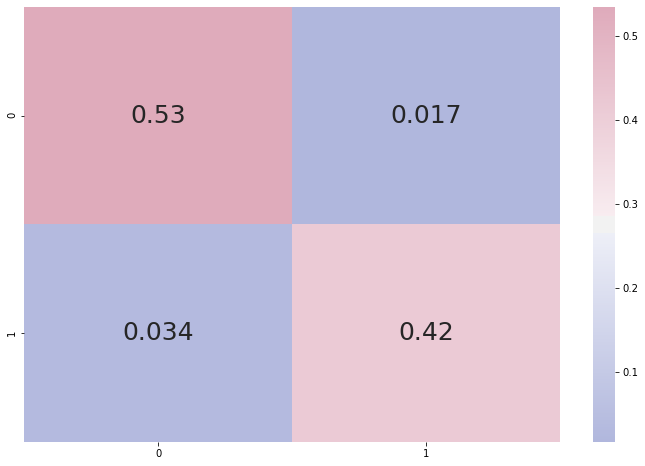

In [29]:
t0=time.time()
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('RF Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for RF is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for RF is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 0.1939995288848877
AdaBoost Model accuracy score: is 0.9556
F1 score for AdaBoost is: 0.9506 
Cohen Kappa score for AdaBoost is: 0.8975 


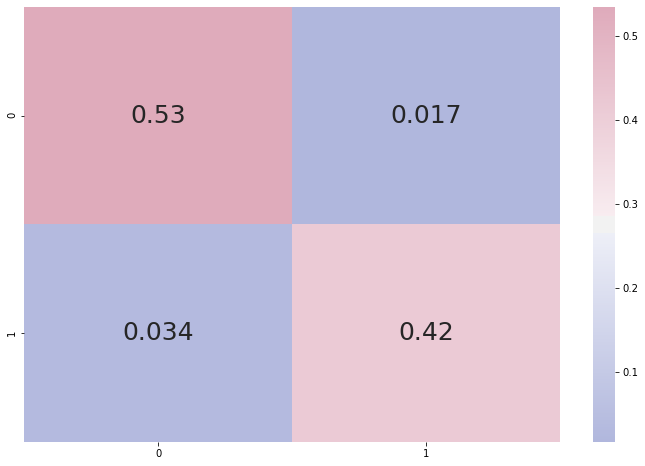

In [30]:
t0=time.time()
ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('AdaBoost Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for AdaBoost is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for AdaBoost is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

Time taken : 1.4240009784698486
ebm Model accuracy score: is 0.9556
F1 score for ebm is: 0.9506 
Cohen Kappa score for ebm is: 0.8975 


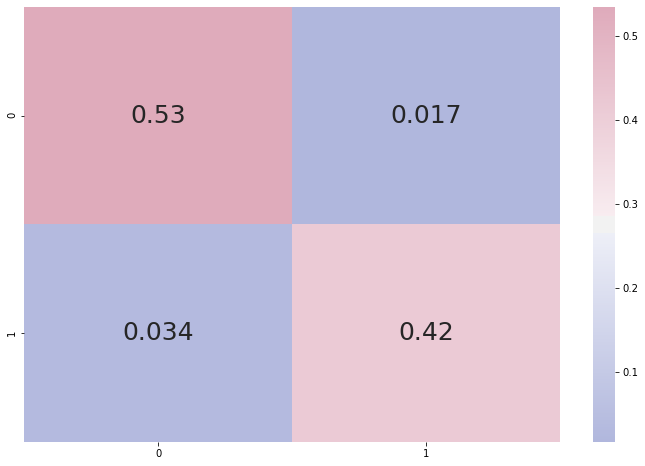

In [31]:
t0=time.time()
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('ebm Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for ebm is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for ebm is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

[23:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken : 0.11500000953674316
XGB Model accuracy score: is 0.9556
F1 score for XGB is: 0.9506 
Cohen Kappa score for XGB is: 0.8975 


C:\Users\Sajjad\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


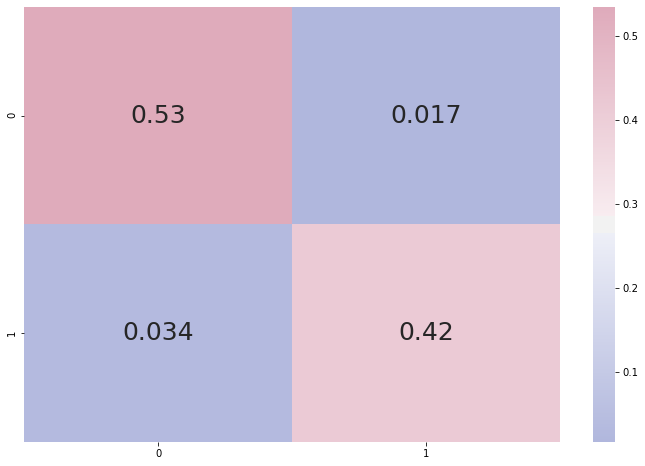

In [32]:
t0=time.time()
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test = DTC.predict(X_test)
acsr=accuracy_score(y_test, Y_pred_test)
f1=f1_score(y_test, Y_pred_test)
ck_lr=cohen_kappa_score(y_test, Y_pred_test)
print('XGB Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for XGB is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for XGB is: {0:0.4f} ". format(ck_lr))

# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,Y_pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})


In this step, we find the best model and evaluate it in test data

# Test Data

In [33]:
test_df = pd.read_csv('Summer_of_AI_Test_Students.csv')

test_df['url_length'] = test_df['URL'].apply(len)
test_df['url_entropy'] = test_df['URL'].apply(entropy)
test_df['3rd_level_domain'] = test_df['URL'].apply(has_www)

test_df['count_non_alpha_full'] = test_df['URL'].str.findall(r'[^a-zA-Z]').str.len() 


test_df['create_age(months)'][test_df['create_age(months)']<0]=np.nan
test_df['expiry_age(months)'][test_df['expiry_age(months)']<0]=np.nan
test_df['update_age(days)'][test_df['update_age(days)']<0]=np.nan

<ipython-input-33-951b0c04da21>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['create_age(months)'][test_df['create_age(months)']<0]=np.nan
<ipython-input-33-951b0c04da21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['expiry_age(months)'][test_df['expiry_age(months)']<0]=np.nan
<ipython-input-33-951b0c04da21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['update_age(days)'][test_df['update_age(days)

In [34]:
df.columns

Index(['create_age(months)', 'expiry_age(months)', 'update_age(days)', 'URL',
       'Label', 'url_length', 'url_entropy', '3rd_level_domain',
       'count_non_alpha_full'],
      dtype='object')

In [35]:
X = test_df[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

In [36]:
X

,create_age(months),expiry_age(months),update_age(days),url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,200.0,40.0,114.0,31,3.708093,1,9
1,210.0,6.0,181.0,33,3.775476,1,9
2,98.0,22.0,81.0,73,4.477936,1,17
3,NaN,NaN,NaN,30,3.606239,1,10
4,181.0,11.0,426.0,23,3.518370,1,9
...,...,...,...,...,...,...,...
1195,53.0,19.0,110.0,70,4.435318,1,14
1196,NaN,6.0,NaN,47,3.950672,0,13
1197,24.0,0.0,668.0,47,4.230358,0,12
1198,252.0,24.0,278.0,28,3.597558,1,9


In [37]:
test_df['Label'] = XGB.predict(X)

In [38]:
test_df.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,200.0,40.0,114.0,http://www.classteacher.com/...,0,31,3.708093,1,9
1,210.0,6.0,181.0,http://www.deadendrecords.com/...,0,33,3.775476,1,9
2,98.0,22.0,81.0,http://www.specialisttrading.com/charts/4rfv/L...,1,73,4.477936,1,17
3,NaN,NaN,NaN,http://www.mingshun.com.tw/...,1,30,3.606239,1,10
4,181.0,11.0,426.0,http://www.jers.com/...,0,23,3.518370,1,9
